Installing required packages...
Package installation and import complete

Thresholds: adj.P.Val < 0.01, |log2FC| > 0.58

PC CORE-4 COMPOUND-TARGET & DEG OVERLAP ANALYSIS

Please upload the following files:
  1. compound_target_network.csv - PC compound-target network
  2. GSE20950_top_table.tsv - Adipose tissue DEG data
  3. GSE43292_top_table.tsv - Atheroma plaque DEG data

Upload window will appear...


Saving GSE20950.top.table.tsv to GSE20950.top.table.tsv
Saving GSE43292.top.table.tsv to GSE43292.top.table.tsv
Saving compound_target_network.csv to compound_target_network.csv

Uploaded files:
  - GSE20950.top.table.tsv
  - GSE43292.top.table.tsv
  - compound_target_network.csv

DATA LOADING AND PREPROCESSING

Identified files:
  GSE20950: GSE20950.top.table.tsv
  GSE43292: GSE43292.top.table.tsv
  Compound-target: compound_target_network.csv

Compound-target network: 407 rows

Loading GSE20950.top.table.tsv...
  Initial rows: 54675
  After removing NaN/empty: 45118
  After removing ambiguous probes: 42904
  Before removing duplicates: 42904
  After removing duplicates: 20848 unique genes
  After filtering (adj.P.Val < 0.01, |logFC| > 0.58): 1997 DEGs

Loading GSE43292.top.table.tsv...
  Initial rows: 33297
  After removing NaN/empty: 22195
  After removing ambiguous probes: 20052
  Before removing duplicates: 20052


  After removing duplicates: 19036 unique genes
  After filtering (adj.P.Val < 0.01, |logFC| > 0.58): 877 DEGs

COMPOUND-TARGET NETWORK PROCESSING

Compound-target network information:
Total compounds: 4
  Polydatin: 54 targets
  Resveratrol: 214 targets
  Emodin: 96 targets
  Physcion: 43 targets

Core-4 compounds total unique targets: 329

Calculating target degree...

Degree distribution:
Degree
4      1
3     14
2     47
1    267
Name: count, dtype: int64

Top 10 targets by degree:
    Gene_Symbol  Degree                           Core4_Compounds
208        NOS2       4  Emodin, Physcion, Polydatin, Resveratrol
24          BAX       3          Physcion, Polydatin, Resveratrol
65       CTNNB1       3            Emodin, Polydatin, Resveratrol
101       GABPA       3            Emodin, Polydatin, Resveratrol
125       HMOX1       3            Emodin, Polydatin, Resveratrol
136        IL1B       3            Emodin, Polydatin, Resveratrol
162      MAPK14       3             Emodin, Phy

Venn diagram saved: PC_GSE20950_GSE43292_VennDiagram.png


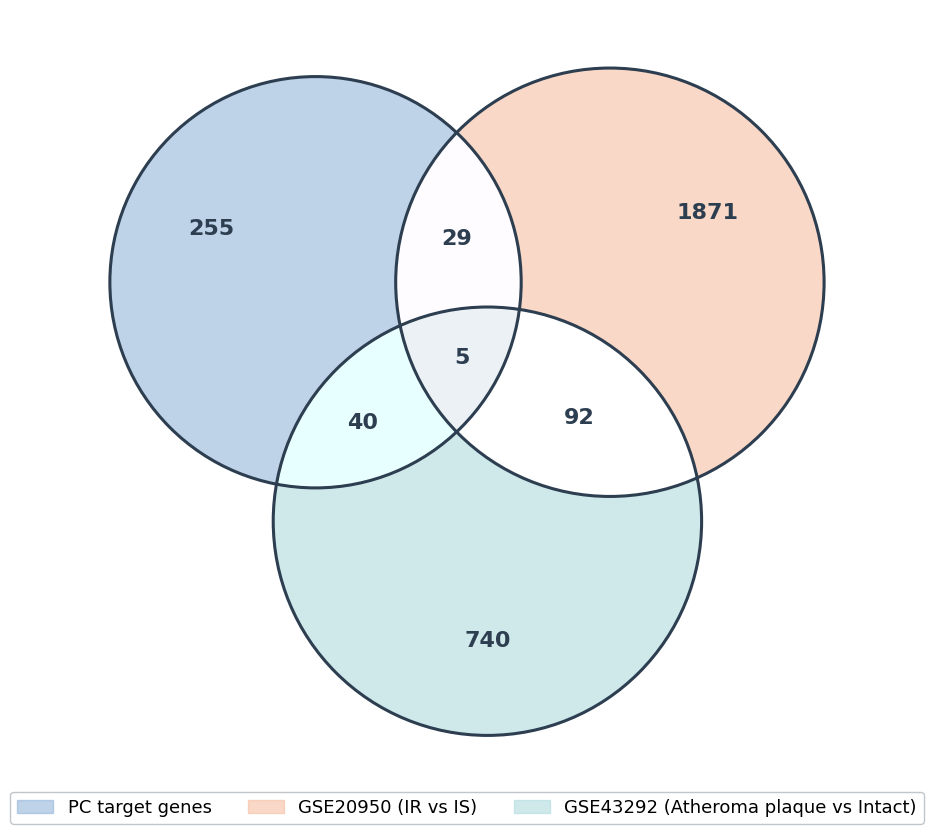


SAVING RESULTS
CSV files saved
Excel file saved: Supplement_Tables_PC_Core4_DEGs.xlsx

3-WAY COMMON GENE ANALYSIS

PC targets ∩ GSE20950 ∩ GSE43292: 5 genes

3-way common genes:
  Gene Symbol        Core-4 Compounds  Degree  GSE20950 logFC  \
1        NOX4  Polydatin, Resveratrol       2          -0.591   
0        FLT1                  Emodin       1          -0.583   
2         PGD                Physcion       1          -0.616   
3       PTGS1                Physcion       1          -0.942   
4        ZEB1               Polydatin       1          -0.703   

   GSE20950 -log10P  GSE43292 logFC  GSE43292 -log10P  
1             3.079          -0.882             4.585  
0             6.714           0.752             3.792  
2             6.328           0.941             4.409  
3             2.072           0.589             4.124  
4             2.783          -0.669             4.559  

3-way common gene table saved: Common_Genes_3way.csv

FILE DOWNLOAD

Preparing files for down

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  Supplement_Tables_PC_Core4_DEGs.xlsx ready for download


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  PC_GSE20950_GSE43292_VennDiagram.png ready for download


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  Supplement_Table_GSE20950.csv ready for download


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  Supplement_Table_GSE43292.csv ready for download


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  Common_Genes_3way.csv ready for download

ANALYSIS SUMMARY

Table 1 (GSE20950): 34 genes
Table 2 (GSE43292): 45 genes
3-way common genes: 5 genes

Venn diagram: PC_GSE20950_GSE43292_VennDiagram.png
Excel file: Supplement_Tables_PC_Core4_DEGs.xlsx

ANALYSIS COMPLETE


In [1]:
"""
PC Core-4 Compound-Target & DEG Overlap Analysis
=================================================

This script analyzes overlapping genes between Polygonum cuspidatum (PC) core-4
compound targets and differentially expressed genes (DEGs) from two datasets:
- GSE20950: Adipose tissue (insulin-resistant vs insulin-sensitive)
- GSE43292: Atheroma plaque vs intact arterial tissue

Core-4 Compounds: Polydatin, Resveratrol, Emodin, Physcion

Author: Noden
Date: 2025-01-26
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
import matplotlib.patches as mpatches
from google.colab import files
from openpyxl import Workbook
from openpyxl.styles import Font, Alignment, PatternFill, Border, Side
from openpyxl.utils.dataframe import dataframe_to_rows
import os

# ============================================================================
# Step 1: Package Installation and Import
# ============================================================================

print("Installing required packages...")
!pip install matplotlib-venn openpyxl -q

# Korean font setup (optional, can be removed for English-only environments)
!apt-get install -y fonts-nanum > /dev/null 2>&1
!fc-cache -fv > /dev/null 2>&1
!rm -rf ~/.cache/matplotlib

import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

print("Package installation and import complete")

# ============================================================================
# Configuration
# ============================================================================

# Statistical thresholds
ADJ_PVAL_THRESHOLD = 0.01
LOG2FC_THRESHOLD = 0.58

# Core-4 compounds
CORE4_COMPOUNDS = ['Polydatin', 'Resveratrol', 'Emodin', 'Physcion']

print(f"\nThresholds: adj.P.Val < {ADJ_PVAL_THRESHOLD}, |log2FC| > {LOG2FC_THRESHOLD}")

# ============================================================================
# Step 2: File Upload
# ============================================================================

print("\n" + "="*80)
print("PC CORE-4 COMPOUND-TARGET & DEG OVERLAP ANALYSIS")
print("="*80)

print("\nPlease upload the following files:")
print("  1. compound_target_network.csv - PC compound-target network")
print("  2. GSE20950_top_table.tsv - Adipose tissue DEG data")
print("  3. GSE43292_top_table.tsv - Atheroma plaque DEG data")
print("\nUpload window will appear...")

uploaded = files.upload()

print("\nUploaded files:")
for filename in uploaded.keys():
    print(f"  - {filename}")

# ============================================================================
# Step 3: Load and Process DEG Data
# ============================================================================

def load_and_clean_deg(filename):
    """
    Load and clean DEG data from TSV file.

    Processing steps:
    1. Remove rows with NaN or empty gene symbols
    2. Remove ambiguous probes (containing '///')
    3. Calculate -log10(adj.P.Val) for visualization
    4. Remove duplicates (keep gene with lowest adj.P.Val)
    5. Filter by statistical thresholds

    Parameters:
    -----------
    filename : str
        Name of the TSV file to load

    Returns:
    --------
    pd.DataFrame
        Cleaned and filtered dataframe
    """
    print(f"\nLoading {filename}...")

    # Load data
    df = pd.read_csv(filename, sep='\t')
    print(f"  Initial rows: {len(df)}")

    # Remove NaN and empty gene symbols
    df = df[df['Gene.symbol'].notna()]
    df = df[df['Gene.symbol'] != '']
    print(f"  After removing NaN/empty: {len(df)}")

    # Remove ambiguous probes (containing '///')
    df = df[~df['Gene.symbol'].str.contains('///', na=False)]
    print(f"  After removing ambiguous probes: {len(df)}")

    # Calculate -log10(adj.P.Val)
    df['neglog10_adjP'] = -np.log10(df['adj.P.Val'])

    # Remove duplicates - keep the one with SMALLEST adj.P.Val
    print(f"  Before removing duplicates: {len(df)}")
    df = df.sort_values('adj.P.Val').groupby('Gene.symbol').first().reset_index()
    print(f"  After removing duplicates: {len(df)} unique genes")

    # Filter by statistical thresholds
    df_filtered = df[
        (df['adj.P.Val'] < ADJ_PVAL_THRESHOLD) &
        (df['logFC'].abs() > LOG2FC_THRESHOLD)
    ].copy()
    print(f"  After filtering (adj.P.Val < {ADJ_PVAL_THRESHOLD}, |logFC| > {LOG2FC_THRESHOLD}): {len(df_filtered)} DEGs")

    # Add uppercase column for case-insensitive matching
    df_filtered['Gene_Symbol_Upper'] = df_filtered['Gene.symbol'].str.upper()

    return df_filtered

print("\n" + "="*80)
print("DATA LOADING AND PREPROCESSING")
print("="*80)

# Identify files by name
uploaded_files = list(uploaded.keys())
gse20950_file = [f for f in uploaded_files if 'GSE20950' in f or '20950' in f][0]
gse43292_file = [f for f in uploaded_files if 'GSE43292' in f or '43292' in f][0]
compound_file = [f for f in uploaded_files if 'compound' in f.lower() or 'target' in f.lower()][0]

print(f"\nIdentified files:")
print(f"  GSE20950: {gse20950_file}")
print(f"  GSE43292: {gse43292_file}")
print(f"  Compound-target: {compound_file}")

# Load compound-target network
compound_target = pd.read_csv(compound_file)
print(f"\nCompound-target network: {compound_target.shape[0]} rows")

# Load and filter DEG datasets
gse20950_clean = load_and_clean_deg(gse20950_file)
gse43292_clean = load_and_clean_deg(gse43292_file)

# ============================================================================
# Step 4: Process Compound-Target Network
# ============================================================================

print("\n" + "="*80)
print("COMPOUND-TARGET NETWORK PROCESSING")
print("="*80)

print("\nCompound-target network information:")
print(f"Total compounds: {compound_target['compound'].nunique()}")
for comp in CORE4_COMPOUNDS:
    count = len(compound_target[compound_target['compound'] == comp])
    print(f"  {comp}: {count} targets")

# Extract Core-4 targets
core4_df = compound_target[compound_target['compound'].isin(CORE4_COMPOUNDS)].copy()
core4_targets = core4_df['target'].unique()
print(f"\nCore-4 compounds total unique targets: {len(core4_targets)}")

# ============================================================================
# Step 5: Calculate Target Degree
# ============================================================================

print("\nCalculating target degree...")

# Calculate degree and connected compounds for each target
target_info = core4_df.groupby('target').agg({
    'compound': lambda x: ', '.join(sorted(x.unique()))
}).reset_index()
target_info.columns = ['Gene_Symbol', 'Core4_Compounds']
target_info['Degree'] = core4_df.groupby('target').size().values

print("\nDegree distribution:")
print(target_info['Degree'].value_counts().sort_index(ascending=False))

print("\nTop 10 targets by degree:")
print(target_info.nlargest(10, 'Degree')[['Gene_Symbol', 'Degree', 'Core4_Compounds']])

# Add uppercase column for matching
target_info['Gene_Symbol_Upper'] = target_info['Gene_Symbol'].str.upper()

# ============================================================================
# Step 6: Overlap Analysis and Table Generation
# ============================================================================

print("\n" + "="*80)
print("OVERLAP ANALYSIS")
print("="*80)

# Table 1: GSE20950 Overlap
print("\nTable 1: GSE20950 overlap analysis...")
table1 = target_info.merge(
    gse20950_clean[['Gene_Symbol_Upper', 'Gene.symbol', 'logFC', 'neglog10_adjP']],
    left_on='Gene_Symbol_Upper',
    right_on='Gene_Symbol_Upper',
    how='inner'
)

table1 = table1[['Gene_Symbol', 'Core4_Compounds', 'Degree', 'logFC', 'neglog10_adjP']].copy()
table1.columns = ['Gene Symbol', 'Core-4 Compounds', 'Degree', 'Log2(Fold Change)', '-log10(adj P)']
table1 = table1.sort_values(['Degree', '-log10(adj P)'], ascending=[False, False]).reset_index(drop=True)
table1['Log2(Fold Change)'] = table1['Log2(Fold Change)'].round(3)
table1['-log10(adj P)'] = table1['-log10(adj P)'].round(3)

print(f"Shared genes: {len(table1)}")
print("\nTop 10 genes:")
print(table1.head(10))

# Table 2: GSE43292 Overlap
print("\n\nTable 2: GSE43292 overlap analysis...")
table2 = target_info.merge(
    gse43292_clean[['Gene_Symbol_Upper', 'Gene.symbol', 'logFC', 'neglog10_adjP']],
    left_on='Gene_Symbol_Upper',
    right_on='Gene_Symbol_Upper',
    how='inner'
)

table2 = table2[['Gene_Symbol', 'Core4_Compounds', 'Degree', 'logFC', 'neglog10_adjP']].copy()
table2.columns = ['Gene Symbol', 'Core-4 Compounds', 'Degree', 'Log2(Fold Change)', '-log10(adj P)']
table2 = table2.sort_values(['Degree', '-log10(adj P)'], ascending=[False, False]).reset_index(drop=True)
table2['Log2(Fold Change)'] = table2['Log2(Fold Change)'].round(3)
table2['-log10(adj P)'] = table2['-log10(adj P)'].round(3)

print(f"Shared genes: {len(table2)}")
print("\nTop 10 genes:")
print(table2.head(10))

# ============================================================================
# Step 7: Venn Diagram Generation
# ============================================================================

print("\n" + "="*80)
print("VENN DIAGRAM GENERATION")
print("="*80)

# Gene sets (uppercase for matching)
pc_targets_set = set(target_info['Gene_Symbol_Upper'])
gse20950_set = set(gse20950_clean['Gene_Symbol_Upper'])
gse43292_set = set(gse43292_clean['Gene_Symbol_Upper'])

# Calculate 7 region sizes for Venn diagram
n100 = len(pc_targets_set - gse20950_set - gse43292_set)               # PC only
n010 = len(gse20950_set - pc_targets_set - gse43292_set)               # GSE20950 only
n001 = len(gse43292_set - pc_targets_set - gse20950_set)               # GSE43292 only
n110 = len((pc_targets_set & gse20950_set) - gse43292_set)             # PC ∩ GSE20950 only
n101 = len((pc_targets_set & gse43292_set) - gse20950_set)             # PC ∩ GSE43292 only
n011 = len((gse20950_set & gse43292_set) - pc_targets_set)             # GSE20950 ∩ GSE43292 only
n111 = len(pc_targets_set & gse20950_set & gse43292_set)               # All three

print("\nVenn diagram intersections:")
print(f"  PC only: {n100}")
print(f"  GSE20950 only: {n010}")
print(f"  GSE43292 only: {n001}")
print(f"  PC ∩ GSE20950 only: {n110}")
print(f"  PC ∩ GSE43292 only: {n101}")
print(f"  GSE20950 ∩ GSE43292 only: {n011}")
print(f"  PC ∩ GSE20950 ∩ GSE43292: {n111}")

# Create Venn diagram
print("\nGenerating Venn diagram...")

fig, ax = plt.subplots(figsize=(10, 9))

# Color palette
colors = ['#8AAED6', '#F5B89A', '#A8D8DC']

# Create Venn diagram with balanced circles
v = venn3(
    subsets=(80, 80, 15, 80, 15, 25, 8),
    set_labels=('', '', ''),
    set_colors=colors,
    alpha=0.55,
    ax=ax
)

# Add circles
c = venn3_circles(
    subsets=(80, 80, 15, 80, 15, 25, 8),
    linewidth=2.2,
    linestyle='solid',
    color='#2C3E50',
    ax=ax
)

# Update labels with actual counts
subset_ids = ['100', '010', '110', '001', '101', '011', '111']
counts = [n100, n010, n110, n001, n101, n011, n111]

for sid, count in zip(subset_ids, counts):
    label = v.get_label_by_id(sid)
    if label is not None:
        if count > 0:
            label.set_text(str(count))
            label.set_fontsize(16)
            label.set_fontweight('bold')
            label.set_color('#2C3E50')
        else:
            label.set_text("")

# Legend
legend_labels = [
    'PC target genes',
    'GSE20950 (IR vs IS)',
    'GSE43292 (Atheroma plaque vs Intact)'
]

legend_patches = [
    mpatches.Patch(color=colors[i], alpha=0.55, label=legend_labels[i])
    for i in range(3)
]

ax.legend(
    handles=legend_patches,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.05),
    ncol=3,
    frameon=True,
    fancybox=True,
    shadow=False,
    fontsize=13,
    edgecolor='#BDC3C7',
    framealpha=0.95
)

# Background settings
ax.set_facecolor('white')
fig.patch.set_facecolor('white')
ax.axis('off')

plt.tight_layout()

# Save figure
venn_filename = "PC_GSE20950_GSE43292_VennDiagram.png"
plt.savefig(venn_filename, dpi=300, bbox_inches="tight", facecolor='white')
print(f"Venn diagram saved: {venn_filename}")
plt.show()

# ============================================================================
# Step 8: Save Results
# ============================================================================

print("\n" + "="*80)
print("SAVING RESULTS")
print("="*80)

# Save CSV files
table1.to_csv('Supplement_Table_GSE20950.csv', index=False)
table2.to_csv('Supplement_Table_GSE43292.csv', index=False)
print("CSV files saved")

# Create Excel file
wb = Workbook()

# Define styles
header_font = Font(bold=True, size=11, color="FFFFFF")
header_fill = PatternFill(start_color="366092", end_color="366092", fill_type="solid")
header_alignment = Alignment(horizontal="center", vertical="center", wrap_text=True)
thin_border = Border(
    left=Side(style='thin'),
    right=Side(style='thin'),
    top=Side(style='thin'),
    bottom=Side(style='thin')
)

def format_worksheet(ws, df, title):
    """Format worksheet with headers and styling"""
    ws.title = title[:31]

    for r_idx, row in enumerate(dataframe_to_rows(df, index=False, header=True), 1):
        for c_idx, value in enumerate(row, 1):
            cell = ws.cell(row=r_idx, column=c_idx, value=value)
            cell.border = thin_border
            cell.alignment = Alignment(horizontal="center", vertical="center")

            if r_idx == 1:
                cell.font = header_font
                cell.fill = header_fill
                cell.alignment = header_alignment

    column_widths = {'A': 15, 'B': 40, 'C': 10, 'D': 18, 'E': 15}
    for col, width in column_widths.items():
        ws.column_dimensions[col].width = width
    ws.row_dimensions[1].height = 30

# Remove default sheet
if 'Sheet' in wb.sheetnames:
    wb.remove(wb['Sheet'])

# Add worksheets
ws1 = wb.create_sheet(title="GSE20950")
format_worksheet(ws1, table1, "GSE20950")

ws2 = wb.create_sheet(title="GSE43292")
format_worksheet(ws2, table2, "GSE43292")

excel_filename = 'Supplement_Tables_PC_Core4_DEGs.xlsx'
wb.save(excel_filename)
print(f"Excel file saved: {excel_filename}")

# ============================================================================
# Step 9: 3-Way Common Gene Analysis
# ============================================================================

print("\n" + "="*80)
print("3-WAY COMMON GENE ANALYSIS")
print("="*80)

# Genes common to all three sets
common_genes_upper = pc_targets_set & gse20950_set & gse43292_set
print(f"\nPC targets ∩ GSE20950 ∩ GSE43292: {len(common_genes_upper)} genes")

if len(common_genes_upper) > 0:
    # Get original gene symbols
    common_genes_info = target_info[target_info['Gene_Symbol_Upper'].isin(common_genes_upper)].copy()

    # Add GSE20950 information
    gse20950_info = gse20950_clean[gse20950_clean['Gene_Symbol_Upper'].isin(common_genes_upper)][
        ['Gene_Symbol_Upper', 'logFC', 'neglog10_adjP']
    ]
    gse20950_info.columns = ['Gene_Symbol_Upper', 'GSE20950_logFC', 'GSE20950_neglog10P']

    # Add GSE43292 information
    gse43292_info = gse43292_clean[gse43292_clean['Gene_Symbol_Upper'].isin(common_genes_upper)][
        ['Gene_Symbol_Upper', 'logFC', 'neglog10_adjP']
    ]
    gse43292_info.columns = ['Gene_Symbol_Upper', 'GSE43292_logFC', 'GSE43292_neglog10P']

    # Merge all information
    common_table = common_genes_info.merge(gse20950_info, on='Gene_Symbol_Upper', how='left')
    common_table = common_table.merge(gse43292_info, on='Gene_Symbol_Upper', how='left')

    common_table = common_table[[
        'Gene_Symbol', 'Core4_Compounds', 'Degree',
        'GSE20950_logFC', 'GSE20950_neglog10P',
        'GSE43292_logFC', 'GSE43292_neglog10P'
    ]].copy()

    common_table.columns = [
        'Gene Symbol', 'Core-4 Compounds', 'Degree',
        'GSE20950 logFC', 'GSE20950 -log10P',
        'GSE43292 logFC', 'GSE43292 -log10P'
    ]

    common_table = common_table.sort_values('Degree', ascending=False)

    # Round numeric columns
    for col in ['GSE20950 logFC', 'GSE20950 -log10P', 'GSE43292 logFC', 'GSE43292 -log10P']:
        common_table[col] = common_table[col].round(3)

    print("\n3-way common genes:")
    print(common_table)

    # Save
    common_table.to_csv('Common_Genes_3way.csv', index=False)
    print("\n3-way common gene table saved: Common_Genes_3way.csv")
else:
    print("No genes common to all three sets.")

# ============================================================================
# Step 10: File Download
# ============================================================================

print("\n" + "="*80)
print("FILE DOWNLOAD")
print("="*80)

print("\nPreparing files for download...")

files_to_download = [
    excel_filename,
    venn_filename,
    'Supplement_Table_GSE20950.csv',
    'Supplement_Table_GSE43292.csv'
]

# Add 3-way common genes file if it exists
if os.path.exists('Common_Genes_3way.csv'):
    files_to_download.append('Common_Genes_3way.csv')

for filename in files_to_download:
    if os.path.exists(filename):
        files.download(filename)
        print(f"  {filename} ready for download")

# ============================================================================
# Final Summary
# ============================================================================

print("\n" + "="*80)
print("ANALYSIS SUMMARY")
print("="*80)

print(f"\nTable 1 (GSE20950): {len(table1)} genes")
print(f"Table 2 (GSE43292): {len(table2)} genes")
print(f"3-way common genes: {len(common_genes_upper)} genes")
print(f"\nVenn diagram: {venn_filename}")
print(f"Excel file: {excel_filename}")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)